# Lasso assignment solution

In [4]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

In [6]:
dataset = load_diabetes()
feature_names = dataset.feature_names
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Lasso model score: 0.56


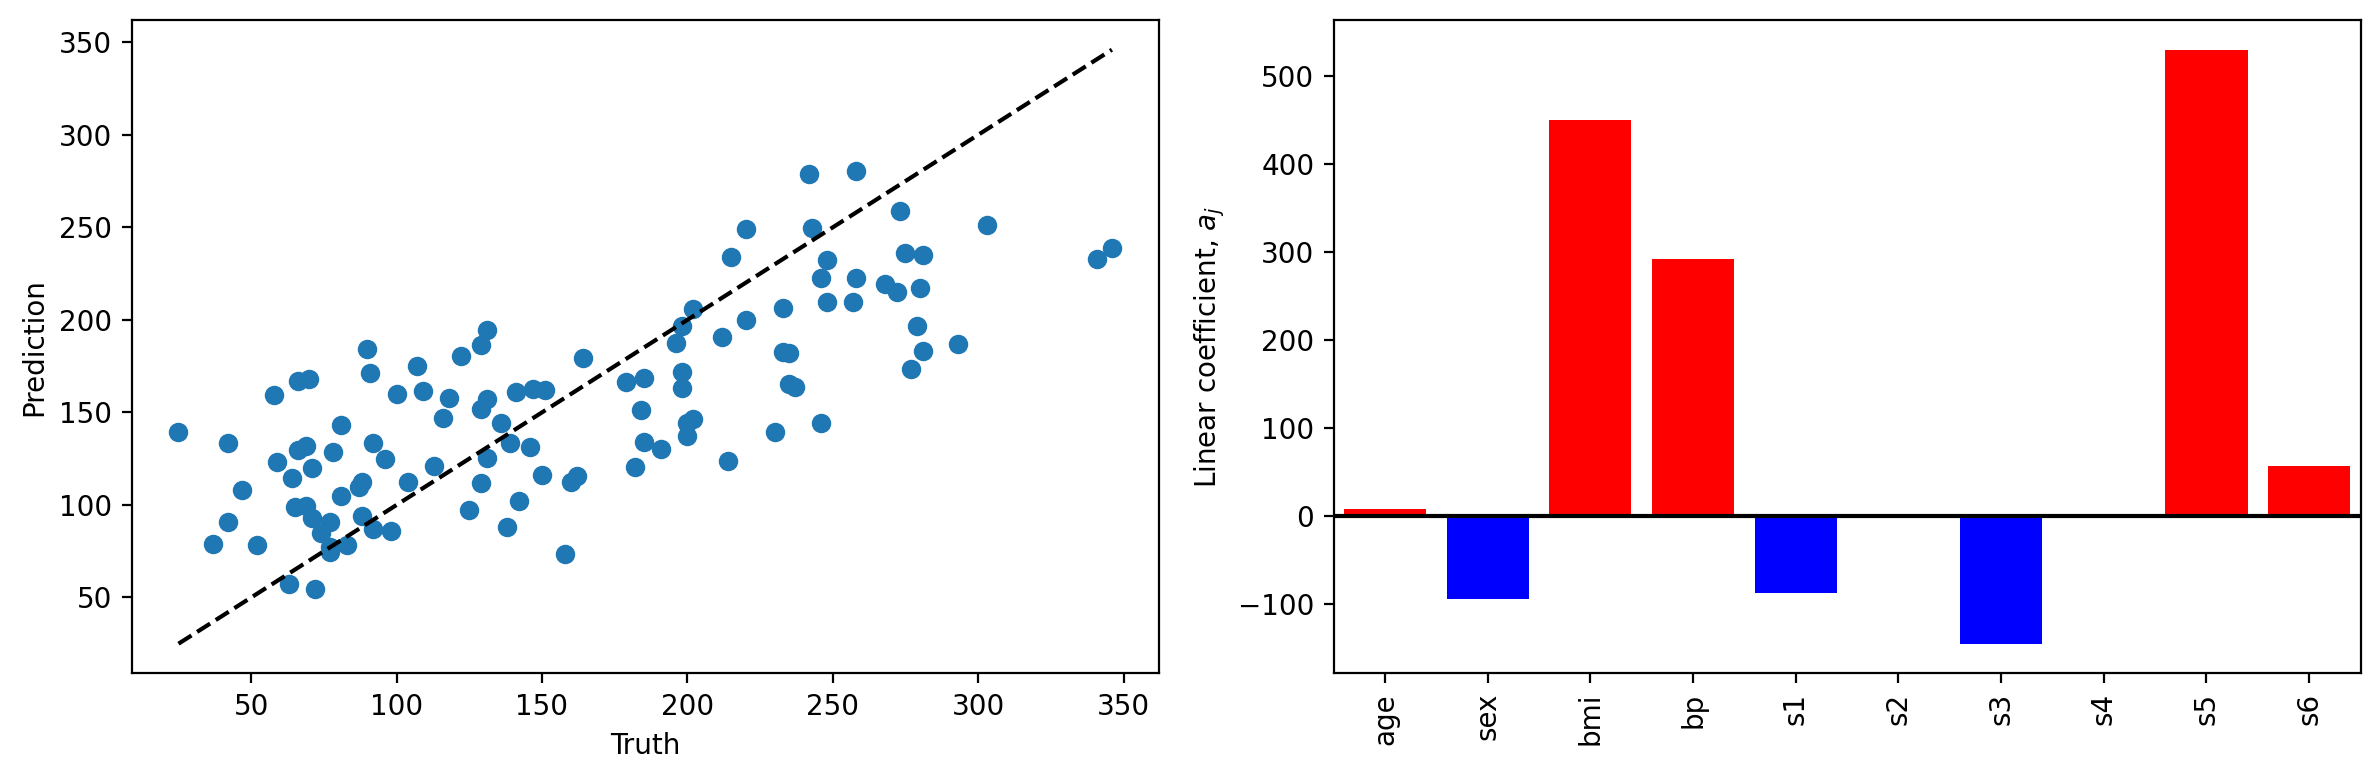

In [7]:
α = 0.1 # which α to use? try LassoCV
reg = Lasso(α)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)
score = reg.score(X_test, y_test)
print('Lasso model score: {:.2f}'.format(score))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.plot(y_test, y_hat, 'o')
yline = np.linspace(y_test.min(), y_test.max())
ax.plot(yline, yline, color='k', ls='--')
ax.set_xlabel("Truth")
ax.set_ylabel("Prediction")

ax = axes[1]
coefs = reg.coef_
coefs_idx = np.arange(len(coefs))
pos_coefs = coefs > 0
neg_coefs = coefs < 0

ax.bar(coefs_idx[pos_coefs], coefs[pos_coefs], color='r')
ax.bar(coefs_idx[neg_coefs], coefs[neg_coefs], color='b')
ax.axhline(0, color='k')
ax.set_ylabel('Linear coefficient, $a_j$');
ax.set_xticks(coefs_idx)
ax.set_xticklabels(feature_names, rotation=90)
ax.set_xlim(-0.5, coefs_idx.max()+0.5)

fig.tight_layout()